In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
from mpl_toolkits.mplot3d import Axes3D

## Question 1

In [30]:
actions = ['hit', 'stick']
bust_threshold = 21
num_curr_sum = 10
num_dealer_showing_card = 10
num_ace_usable = 2
V = np.zeros((num_curr_sum, num_dealer_showing_card, num_ace_usable))
A_V = np.zeros((num_curr_sum, num_dealer_showing_card, num_ace_usable, len(actions)))
total_games_1 = 10000
total_games_2 = 500000

In [31]:
class blackjack_game:
	def __init__(self, state=None, action=None, pl_curr_sum=0, dealer_showing_card=0, usable_ace=0, dealer_card_2=0, dealer_card_sum=0, dealer_usable_ace=0, es=False):
		
		self.pl_curr_sum = pl_curr_sum
		self.usable_ace = usable_ace
		self.dealer_showing_card = dealer_showing_card
		self.state = state
		self.action = action
		self.es = es
		
		if(self.es==False):
			self.pl_curr_sum, self.usable_ace, self.dealer_showing_card = self.initiate_game()
			self.state = state
			self.action = action
			self.dealer_card_2 = 0
			self.dealer_card_sum = self.dealer_showing_card
			self.dealer_usable_ace = 0

		else:
			self.pl_curr_sum, self.usable_ace, self.dealer_showing_card, self.state, self.action, self.dealer_card_2, self.dealer_card_sum, self.dealer_usable_ace = self.exploring_starts_initial()

	def exploring_starts_initial(self):
		pl_curr_sum = np.random.randint(11, 22)
		usable_ace = np.random.randint(0,2)
		dealer_showing_card = np.random.randint(1, 11)
		state = [pl_curr_sum, usable_ace, dealer_showing_card]
		action = np.random.choice(actions)

		dealer_card_2 = self.hit()
		dealer_card_sum = 0
		dealer_usable_ace = True
		if(self.card_type(dealer_card_2)=='ace_card' and self.card_type(dealer_showing_card)=='ace_card'):
			dealer_card_sum = 12
		elif(self.card_type(dealer_card_2)=='ace_card'):
			dealer_card_sum = 11 + dealer_showing_card
		elif(self.card_type(dealer_showing_card)=='ace_card'):
			dealer_card_sum = 11 + dealer_card_2
		else:
			dealer_usable_ace = False
			dealer_card_sum = dealer_showing_card + dealer_card_2

		return pl_curr_sum, usable_ace, dealer_showing_card, state, action, dealer_card_2, dealer_card_sum, dealer_usable_ace

	def card_type(self, card_val):
		if(card_val==11 or card_val==12 or card_val==13):
			return 'face_card'
		elif(card_val==1):
			return 'ace_card'
		else:
			return 'normal'

	def stick_or_hit(self, card_sum):
		if(card_sum==20 or card_sum==21):
			return 'stick'
		elif(card_sum<20):
			return 'hit'
		elif(card_sum>21):
			return 'bust'

	def is_bust(cards_sum):
		if(cards_sum>bust_threshold):
			return True
		else:
			return False

	def hit(self):
		# Cards in the deck: A-1; 2-10; J-11; Q-12; K-13  
		selected_card = np.random.randint(1, 14)
		card_type = self.card_type(selected_card)
		if(card_type=='face_card'):
			return 10
		else:
			return selected_card

	def initiate_game(self):
		# PHASE 1: PLAYER STARTS THE GAME
		player_curr_sum = 0
		player_usable_ace = 0

		while(player_curr_sum < 12):
			card_received = self.hit()
			if(card_received!=1):
				player_curr_sum += card_received
			else:
				if(player_curr_sum + 11 < 22):
					player_usable_ace = 1
					player_curr_sum += 11
				else:
					player_curr_sum += 1

		# DEALER'S INITIAL CARD WITH FACE UP
		dealer_initial_card = self.hit()
		return player_curr_sum, player_usable_ace, dealer_initial_card

In [32]:
def behaviour_policy():
	r = np.random.randint(0, 2)
	return actions[r]

In [39]:
def play_game(game_env, policy_b=None, policy_es=None):
    episode_new = []
    is_bust = False
    # initialising the variables
    curr_sum = game_env.pl_curr_sum
    usable_ace = game_env.usable_ace
    dealers_card = game_env.dealer_showing_card
    curr_state = game_env.state
    curr_action_type = game_env.action
    dealer_card_2 = game_env.dealer_card_2
    dealers_sum = game_env.dealer_card_sum
    dealers_usable_ace = game_env.dealer_usable_ace
    dealers_is_bust = False

    if(curr_state==None):
        curr_state = [curr_sum, usable_ace, dealers_card]
    if(curr_action_type==None and policy_b==None):
        curr_action_type = game_env.stick_or_hit(curr_sum)
    elif(curr_action_type==None):
        curr_action_type = behaviour_policy()
        
    # PLAYER PLAYS THE GAME FIRST
    while(1):
        curr_state = [curr_sum, usable_ace, dealers_card]
        episode_new.append([curr_state, curr_action_type])

        if(curr_action_type=='hit'):
            card_picked = game_env.hit()
            if(card_picked!=1): # card picked is not an ace
                if(curr_sum + card_picked <= 21):
                    curr_sum += card_picked
                elif(curr_sum + card_picked - 10 < 21 and usable_ace == 1):
                    curr_sum -= 10
                    usable_ace = 0
                    curr_sum += card_picked
                elif(curr_sum + card_picked > 21 and usable_ace == 0):
                    is_bust = True
                    return episode_new, -1
            else: # card picked is an ace
#                 if(usable_ace==1):
#                     if(curr_sum+1>21):
#                         curr_sum -= 10
#                         curr_sum += 1
#                         usable_ace = 0
#                     else:
#                         curr_sum += 1
#                 else:
#                     if(curr_sum + 11 < 22):
#                         curr_sum += 11
#                         usable_ace = 1
#                     else:
#                         if(curr_sum + 1 < 22):
#                             curr_sum += 1
#                         else:
#                             is_bust = True
#                             return episode_new, -1
                if(curr_sum + 11 < 22):
                    curr_sum += 11
                    usable_ace = 1
                else:
                    if(curr_sum + 1 <=21):
                        curr_sum += 1
                    elif(curr_sum + 1 - 10 < 21 and usable_ace == 1):
                        usable_ace = 0
                        curr_sum -= 10
                        curr_sum += 1
                    elif(curr_sum + 1 > 21 and usable_ace == 0):
                        curr_sum += 1
                        is_bust = True
                        return episode_new, -1
        elif(curr_action_type=='stick'):
            break
        elif(curr_action_type=='bust'):
            is_bust = True
            return episode_new, -1

        if(policy_b is None): # for no off policy
            curr_action_type = game_env.stick_or_hit(curr_sum)
        elif(policy_es is not None): # for exploring starts
            curr_action_type = actions[(int)(policy_es[curr_sum-12, dealers_card-1, usable_ace])]
        else:
            curr_action_type = behaviour_policy()

    # NOW, DEALER PLAYS THE GAME
    while(1):
        if(dealers_sum <= 16): # condition for the dealer to keep hitting
            card_picked = game_env.hit()
            if(card_picked!=1): # if card picked is not an ace
                if(dealers_sum + card_picked <=21):
                    dealers_sum += card_picked
                elif(dealers_sum + card_picked > 21 and dealers_usable_ace == 1):
                    dealers_sum -= 10
                    dealers_usable_ace = 0
                    dealers_sum += card_picked
                elif(dealers_sum + card_picked > 21 and dealers_usable_ace == 0):
                    dealers_sum += card_picked
                    dealers_is_bust = True
                    return episode_new, 1
            else: # if card picked is an ace
                if(dealers_sum + 11 < 22):
                    dealers_usable_ace = 1
                    dealers_sum += 11
                else:
                    if(dealers_sum + 1 <= 21):
                        dealers_sum += 1
                    elif(dealers_sum + 1 > 21 and dealers_usable_ace == 1):
                        dealers_sum -= 10
                        dealers_usable_ace = 0
                        dealers_sum += 1
                    elif(dealers_sum + 1 > 21 and dealers_usable_ace == 0): # bust scenario
                        dealers_sum += 1
                        dealers_is_bust = True
                        return episode_new, 1
        else:
            break

    # if none of them get bust, decide thewinner as per the one who has closer sum to 21. 
    if(curr_sum > dealers_sum):
        return episode_new, 1
    elif(dealers_sum > curr_sum):
        return episode_new, -1
    else:
        return episode_new, 0

## FIGURE 5.1

In [173]:
def monte_carlo_every_visit(num_episodes):
	state_value = np.zeros_like(V)
	usable_aces = np.ones_like(state_value)
	for i in range(0, num_episodes):
		# Randomly initiate the start state of the game. 
		game = blackjack_game()
		episode, reward = play_game(game)
		time_steps = len(episode) - 1
        # for all time steps in the generated episode
		for j in range(time_steps, -1, -1):
			St, At = episode[j][0], episode[j][1]
			players_curr_sum = St[0]
			players_usable_ace = St[1]
			dealers_showing_card = St[2]
			state_value[players_curr_sum-12, dealers_showing_card-1, players_usable_ace] += reward
            # in order to keep a count of the usable and non usable aces for each state 
			usable_aces[players_curr_sum-12, dealers_showing_card-1, players_usable_ace] +=1

	state_value = state_value / usable_aces
	return state_value

In [15]:
def plot_surface_3d(matrix, t):
    # Function for plotting 3D surface plots 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_axis = np.arange(1, 11)
    y_axis = np.arange(12, 22)
    x_axis, y_axis = np.meshgrid(x_axis, y_axis)
    matrix = matrix.reshape(x_axis.shape)
    ax.plot_surface(x_axis, y_axis, matrix)
    plt.title(t)
    plt.show()
    plt.close()

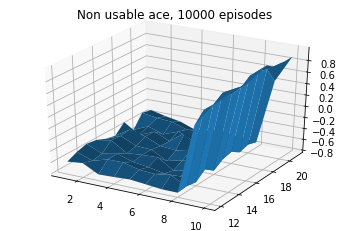

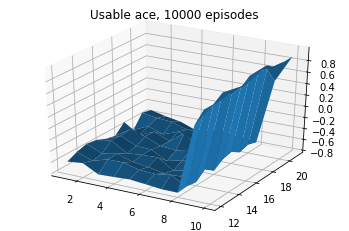

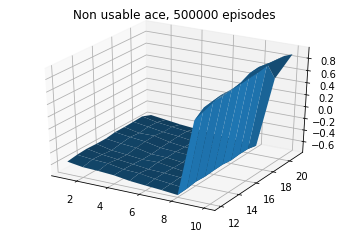

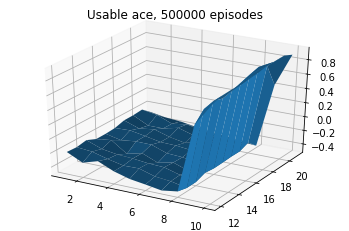

In [175]:
St_10000 = monte_carlo_every_visit(10000)

St_10000_non_usable = np.transpose(St_10000[:, :, 0], (1, 0))
plot_surface_3d(St_10000_non_usable, "Non usable ace, 10000 episodes")
St_10000_usable = np.transpose(St_10000[:, :, 1], (1, 0))
plot_surface_3d(St_10000_non_usable, "Usable ace, 10000 episodes")

St_500000 = monte_carlo_every_visit(500000)

plot_surface_3d(St_500000_non_usable, "Non usable ace, 500000 episodes")
plot_surface_3d(St_500000_usable, "Usable ace, 500000 episodes")

## FIGURE 5.2


In [40]:
def monte_carlo_exploring_starts(num_episodes):
    state_action_value = np.zeros_like(A_V)
    usable_aces_1 = np.ones_like(state_action_value)
    policy = np.zeros((10, 10, 2))
    returns = np.zeros_like(A_V)
    returns_count = np.zeros_like(A_V)
    
    for i in range(0, num_episodes):    
        # Randomly initiate the start state of the game. 
        game_es = blackjack_game(es=True)
        episode, reward = play_game(game_es, policy_es=policy)
        time_steps = len(episode) - 1
        G = 0
        # considering each time step in the generated episode
        for j in range(time_steps, -1, -1):
            St, At = episode[j][0], episode[j][1]
            players_curr_sum = St[0]
            players_usable_ace = St[1]
            dealers_showing_card = St[2]
            # updating the new average 
            returns_count[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, actions.index(At)] += 1
            returns[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, actions.index(At)] += (reward - returns[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, actions.index(At)])/ returns_count[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, actions.index(At)]
            # updating the state-action-value function as per the new average calculated.
            state_action_value[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, actions.index(At)] += returns[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, actions.index(At)]
            policy[players_curr_sum-12, dealers_showing_card-1, players_usable_ace] = np.argmax(state_action_value[players_curr_sum-12, dealers_showing_card-1, players_usable_ace, :], axis=-1)
    
    return state_action_value, policy

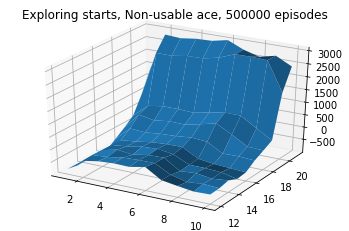

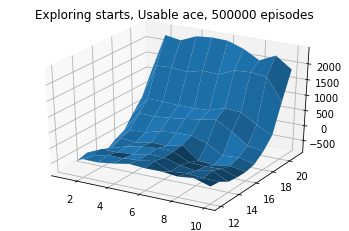

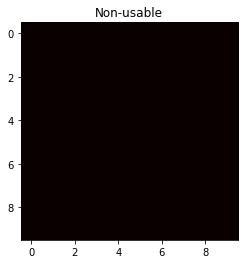

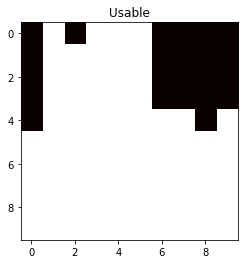

In [43]:
state_action_value, policy = monte_carlo_exploring_starts(500000)

plot_surface_3d(np.max(state_action_value[:, :, 0, :], axis=-1), "Exploring starts, Non-usable ace, 500000 episodes")
plot_surface_3d(np.max(state_action_value[:, :, 1, :], axis=-1), "Exploring starts, Usable ace, 500000 episodes")

policy_non_usable = policy[:, :, 0]
plt.imshow(policy_non_usable, cmap='hot')
plt.title('Non-usable')
plt.show()
plt.close()

policy_usable = policy[:, :, 1]
plt.imshow(policy_usable, cmap='hot')
plt.title('Usable')
plt.show()
plt.close()

## FIGURE 5.3

In [241]:
num_episodes = 10000
runs = 100
ordinary_sampling_err = np.zeros((runs, num_episodes))
weighted_sampling_err = np.zeros((runs, num_episodes))
calculated_val = -0.27726

import copy

def mc_off_policy(num_episodes):
	G_values = np.zeros(num_episodes)
	policy_ratios = np.zeros(num_episodes)
	for i in range(num_episodes):
		game = blackjack_game()
		curr_state = [13, 1, 2]
		game.pl_curr_sum = 13
		game.usable_ace = 1
		game.dealer_showing_card = 2
		episode, reward = play_game(game, policy_b=1)
		time_steps = len(episode) - 1
		ratio = 1
		for j in range(time_steps, -1, -1):
			St, At = episode[j][0], episode[j][1]
			if(At != game.stick_or_hit(St[0])):
				ratio *= 0.0
				break
			else:
				ratio *= 2.0
		policy_ratios[i] = ratio
		G_values[i] = reward

	return np.add.accumulate(policy_ratios * G_values), np.add.accumulate(policy_ratios)

In [242]:
for i in range(0, runs):
    g_weighted, ratios_weighted = mc_off_policy(num_episodes)
    ordinary_sampling = g_weighted / np.arange(1, num_episodes + 1)
    weighted_sampling = np.zeros_like(g_weighted)
    for j in range(num_episodes):
    	if(ratios_weighted[j]!=0):
    		weighted_sampling[j] = g_weighted[j] / ratios_weighted[j]
    
    ordinary_sampling_err[i] = (ordinary_sampling-calculated_val)**2
    weighted_sampling_err[i] = (weighted_sampling-calculated_val)**2


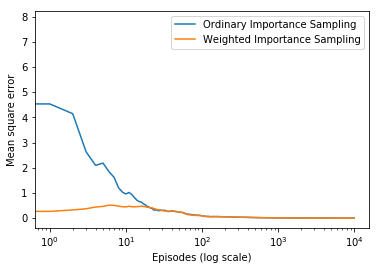

In [238]:
plt.plot(np.mean(ordinary_sampling_err, axis=0), label='Ordinary Importance Sampling')
plt.plot(np.mean(weighted_sampling_err, axis=0), label='Weighted Importance Sampling')
plt.xlabel('Episodes (log scale)')
plt.ylabel('Mean square error')
plt.xscale('log')
plt.legend()
plt.show()
plt.close()

## Question 6

In [82]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import random

In [83]:
actions = {'left': -1, 'right': 1}
num_states = 7
V_true = np.asarray([0., 1./6, 2./6, 3./6, 4./6, 5./6, 0.])

In [84]:
# utility functions
def is_terminal(state):
	if(state==0 or state==6):
		return True
	else:
		return False

def step(St, At):
	new_state = St + actions[At]
	
	if(new_state==6):
		reward = 1
	else:
		reward = 0

	return new_state, reward

def rmse(V_estimated):
	diff = np.sqrt(np.sum(np.square((V_estimated[1:6] - V_true[1:6]))) / (num_states-2))
	return diff

In [88]:
def monte_carlo(alpha, num_episodes):
	state_value = np.zeros(num_states)
	state_value[1:6] = 0.5 # initialising the non-terminal states

	rms_error = []
	start_state = 3 # starting from the middle for convenience
	for i in range(num_episodes):
		generated_sequence = []
		curr_state = start_state

		while(True):
			At = random.choice(list(actions.keys()))
			S_next, reward = step(curr_state, At)
			generated_sequence.append([curr_state, S_next, reward])
			curr_state = S_next
			if(is_terminal(curr_state)):
				break

		ret = 0
		time_steps = len(generated_sequence) - 1
		for t in range(time_steps, -1, -1):
			ret += generated_sequence[t][2] # adding reward from the generated sequence stepwise
			state_value[generated_sequence[t][0]] += alpha * (ret - state_value[generated_sequence[t][0]])

		rms_error.append(rmse(state_value))

	return rms_error, state_value

In [89]:
def TD0(alpha, num_episodes):
	state_value = np.zeros(num_states)
	state_value[1:6] = 0.5 # initialising the non-terminal states

	rms_error = []
	start_state = 3 # starting from the middle for convenience
	for i in range(num_episodes):
		curr_state = start_state

		while(True):
			At = random.choice(list(actions.keys()))
			S_next, reward = step(curr_state, At)
			state_value[curr_state] += alpha * (reward + state_value[S_next] - state_value[curr_state])
			curr_state = S_next

			if(is_terminal(curr_state)):
				break

		rms_error.append(rmse(state_value))

	return rms_error, state_value

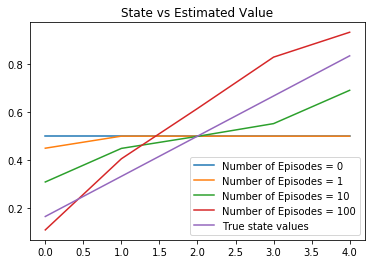

In [90]:
number_of_episodes = [0, 1, 10, 100]

for n in number_of_episodes:
	err, Vs = TD0(0.1, n)
	plt.plot(Vs[1:6], label = 'Number of Episodes = ' + str(n))

plt.plot(V_true[1:6], label = 'True state values')
plt.legend()
plt.title('State vs Estimated Value')
plt.show()

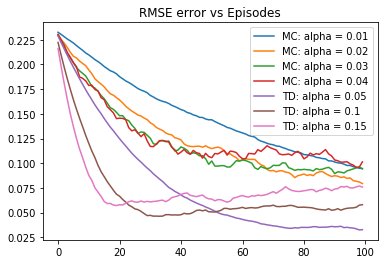

In [91]:
list_alphas_mc = [0.01, 0.02, 0.03, 0.04]
list_alphas_td = [0.05, 0.10, 0.15]
runs = 100

for m in list_alphas_mc:
	avg_rmse = []
	for r in range(0, runs):
		err, Vs = monte_carlo(m, 100)
		avg_rmse.append(err)
	avg_rmse = (np.sum(np.asarray(avg_rmse), axis=0) * 1.0) / runs
	plt.plot(avg_rmse, label = "MC: alpha = " + (str)(m))

for t in list_alphas_td:
	avg_rmse = []
	for r in range(0, runs):
		err, Vs = TD0(t, 100)
		avg_rmse.append(err)
	avg_rmse = (np.sum(np.asarray(avg_rmse), axis=0) * 1.0) / runs
	plt.plot(avg_rmse, label = "TD: alpha = " + (str)(t))

plt.legend()
plt.title('RMSE error vs Episodes')
plt.show()

## Question 7

In [125]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import random

In [126]:
actions = {'up':[0, -1], 'down':[0, 1], 'left':[-1, 0], 'right':[1, 0]}
actions_index = {'up':0, 'down':1, 'left':2, 'right':3}
num_states = 48
num_actions = 4
alpha = 0.5
epsilon = 0.1
num_runs = 100
num_episodes = 500

In [127]:
def is_terminal(current_state):
	if(current_state==[0, 11]):
		return True
	else:
		return False

def on_cliff(current_state):
	if(current_state[0]==0 and (current_state[1]>0 and current_state[1]<11)):
		return True
	else:
		return False

def step(current_state, current_action):
	if(current_action=='up'):
		next_state = [current_state[0] + actions['up'][0], current_state[1] + actions['up'][1]]
	elif(current_action=='down'):
		next_state = [current_state[0] + actions['down'][0], current_state[1] + actions['down'][1]]
	elif(current_action=='left'):
		next_state = [current_state[0] + actions['left'][0], current_state[1] + actions['left'][1]]
	elif(current_action=='right'):
		next_state = [current_state[0] + actions['right'][0], current_state[1] + actions['right'][1]]

	if(on_cliff(next_state)):
		reward = -100
		next_state = [0, 0]
		return next_state, reward
	else:
		reward = -1
		if(next_state[0]<0 or next_state[0]>3 or next_state[1]<0 or next_state[1]>11):
			next_state = current_state
		return next_state, reward

def epsilon_greedy(current_state, state_action_value):
	p = random.random()
	if(p < epsilon):
		action_chosen = random.choice(list(actions.keys())) 
	else:
		action_chosen = list(actions.keys())[np.argmax(state_action_value[current_state[0]*12 + current_state[1], :])]
	return action_chosen

In [128]:
def SARSA(num_episodes):
	state_action_value = np.zeros((num_states, num_actions))
	start_state = [0, 0]
	total_reward = np.zeros((num_episodes))

	for i in range(num_episodes):
		curr_state = start_state
		curr_action = epsilon_greedy(curr_state, state_action_value)

		while(True):
			next_state, reward = step(curr_state, curr_action)
			total_reward[i] += reward
			next_action = epsilon_greedy(next_state, state_action_value)
			state_action_value[curr_state[0]*12 + curr_state[1], actions_index[curr_action]] += alpha * (reward + state_action_value[next_state[0]*12 + next_state[1], actions_index[next_action]] - state_action_value[curr_state[0]*12 + curr_state[1], actions_index[curr_action]]) 
			curr_state = next_state
			curr_action = next_action
			
			if(is_terminal(curr_state)):
				break
		total_reward[i] = max(-100, total_reward[i])
	return total_reward

In [129]:
def Q_Learning(num_episodes):
	state_action_value = np.zeros((num_states, num_actions))
	start_state = [0, 0]
	total_reward = np.zeros((num_episodes))

	for i in range(num_episodes):
		curr_state = start_state

		while(True):
			curr_action = epsilon_greedy(curr_state, state_action_value)
			next_state, reward = step(curr_state, curr_action)
			total_reward[i] += reward
			next_action = np.argmax(state_action_value[curr_state[0]*12 + curr_state[1]])
			state_action_value[curr_state[0]*12 + curr_state[1], actions_index[curr_action]] += alpha * (reward + state_action_value[next_state[0]*12 + next_state[1], next_action] - state_action_value[curr_state[0]*12 + curr_state[1], actions_index[curr_action]])
			curr_state = next_state

			if(is_terminal(curr_state)):
				break
		total_reward[i] = max(-100, total_reward[i])

	return total_reward

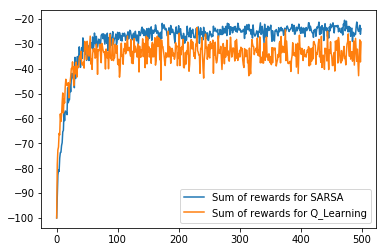

In [130]:
sum_rewards_SARSA = []
sum_rewards_QLEARNING = []

for i in range(num_runs):
	sum_rewards_SARSA.append(SARSA(num_episodes))
	sum_rewards_QLEARNING .append(Q_Learning(num_episodes))

sum_rewards_SARSA = np.sum(np.asarray(sum_rewards_SARSA), axis=0) / num_runs
sum_rewards_QLEARNING = np.sum(np.asarray(sum_rewards_QLEARNING), axis=0) / num_runs

plt.plot(sum_rewards_SARSA, label='Sum of rewards for SARSA')
plt.plot(sum_rewards_QLEARNING, label='Sum of rewards for Q_Learning')
plt.legend()
plt.show()